# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | santa maria
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | ignalina
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | minas de marcona
Processing Record 10 of Set 1 | oyama
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | coari
Processing Record 13 of Set 1 | al marj
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | swabi
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | novobelokatay
Processing Record 21 of Set 1 | bossangoa
Processing Record 22 of Set 1 | aasiaa

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,28.01,73,2,2.59,IN,1694660161
1,yellowknife,62.4560,-114.3525,15.31,83,100,2.57,CA,1694660132
2,santa maria,-29.6842,-53.8069,10.61,100,100,2.57,BR,1694660162
3,carnarvon,-24.8667,113.6333,21.33,57,0,3.10,AU,1694660162
4,albany,42.6001,-73.9662,18.36,93,2,2.17,US,1694660162


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,28.01,73,2,2.59,IN,1694660161
1,yellowknife,62.4560,-114.3525,15.31,83,100,2.57,CA,1694660132
2,santa maria,-29.6842,-53.8069,10.61,100,100,2.57,BR,1694660162
3,carnarvon,-24.8667,113.6333,21.33,57,0,3.10,AU,1694660162
4,albany,42.6001,-73.9662,18.36,93,2,2.17,US,1694660162


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

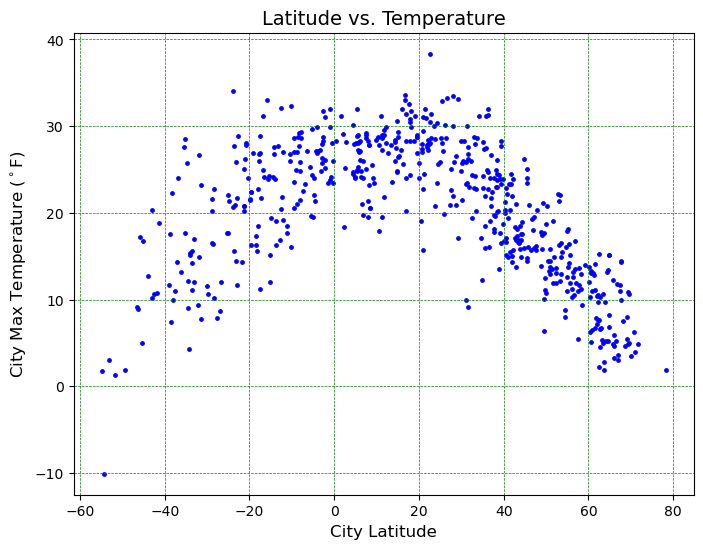

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], s=6, color="b", marker="o")

# Set labels and title
plt.xlabel('City Latitude', fontsize=12)
plt.ylabel('City Max Temperature ($^\circ$F)', fontsize=12)
plt.title('Latitude vs. Temperature', fontsize=14)

# Add a grid
plt.grid(color='green', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

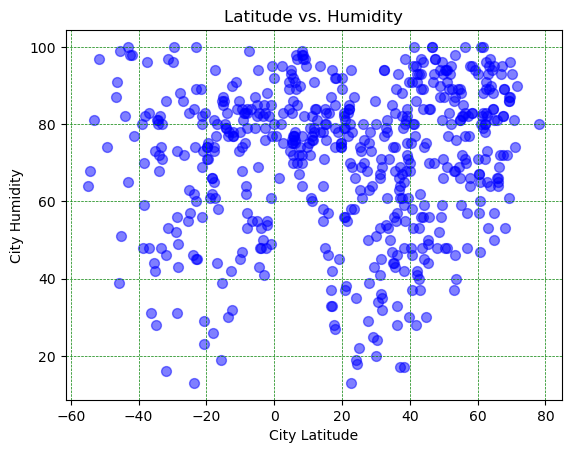

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            s=50,color="b", marker="o",edgecolors='b',alpha=.5)

# Incorporate the other graph properties
plt.xlabel('City Latitude',fontsize =10)
plt.ylabel('City Humidity',fontsize =10)
plt.title('Latitude vs. Humidity')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

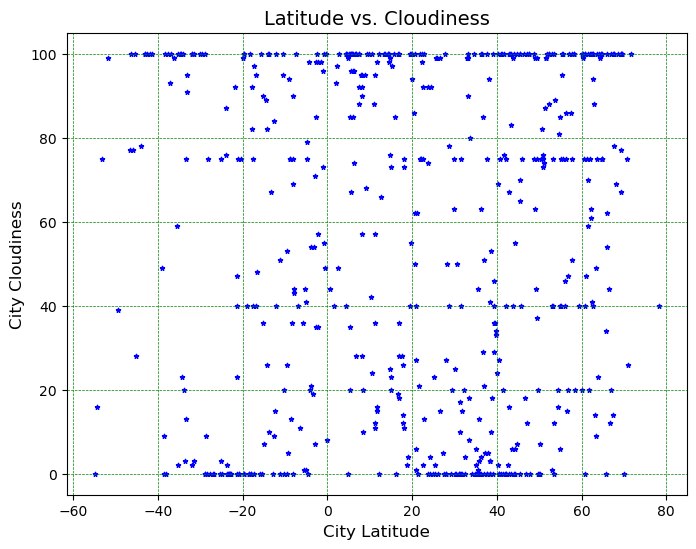

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the scatter plot
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    s=10,
    color="purple",
    marker="*",
    edgecolors='b',
    alpha=1
)

# Set labels and title
plt.xlabel('City Latitude', fontsize=12)
plt.ylabel('City Cloudiness', fontsize=12)
plt.title('Latitude vs. Cloudiness', fontsize=14)

# Add a grid
plt.grid(color='green', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

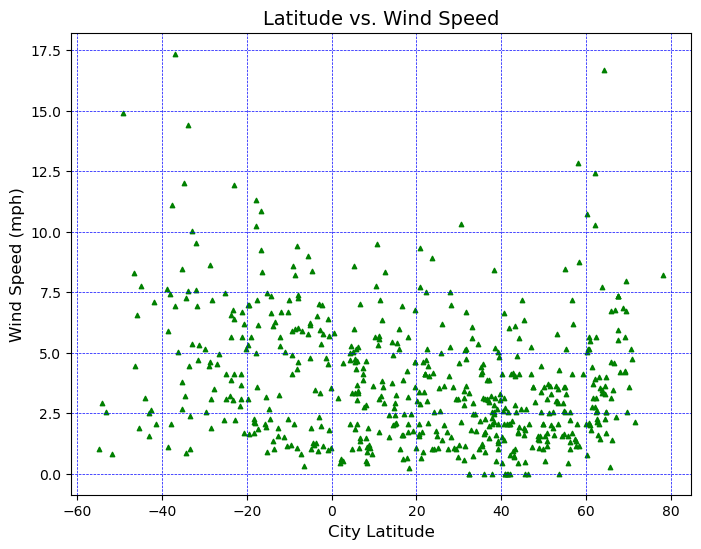

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s=10, color="green", marker="^")

# Set labels and title
plt.xlabel('City Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Latitude vs. Wind Speed', fontsize=14)

# Add a grid
plt.grid(color='blue', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    # Calculate the Pearson correlation coefficient
    r = pearsonr(x, y)
    print(f"The r-value is: {round(r[0], 4)}")
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color="red")
    
    # Create a scatter plot of the data points
    plt.scatter(x, y)
    
    # Set labels
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,28.01,73,2,2.59,IN,1694660161
1,yellowknife,62.4560,-114.3525,15.31,83,100,2.57,CA,1694660132
4,albany,42.6001,-73.9662,18.36,93,2,2.17,US,1694660162
5,olonkinbyen,70.9221,-8.7187,3.92,74,26,4.75,SJ,1694660163
6,ignalina,55.3500,26.1667,16.41,72,95,3.30,LT,1694660163


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,santa maria,-29.6842,-53.8069,10.61,100,100,2.57,BR,1694660162
3,carnarvon,-24.8667,113.6333,21.33,57,0,3.10,AU,1694660162
7,hermanus,-34.4187,19.2345,12.10,80,100,7.25,ZA,1694660163
8,minas de marcona,-15.2119,-75.1103,12.08,87,90,7.45,PE,1694660163
11,coari,-4.0850,-63.1414,26.94,48,20,1.18,BR,1694659996


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8253


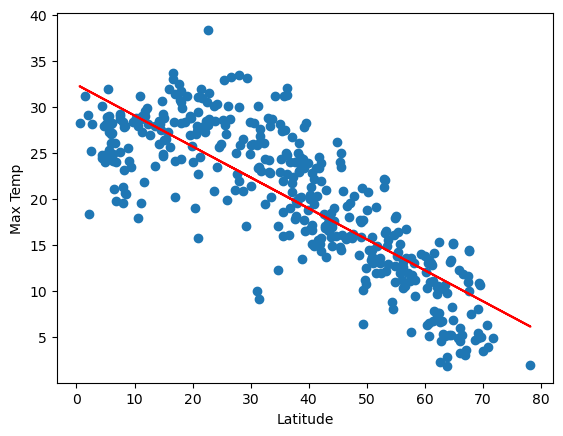

In [15]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"],(0,50))

The r-value is: 0.713


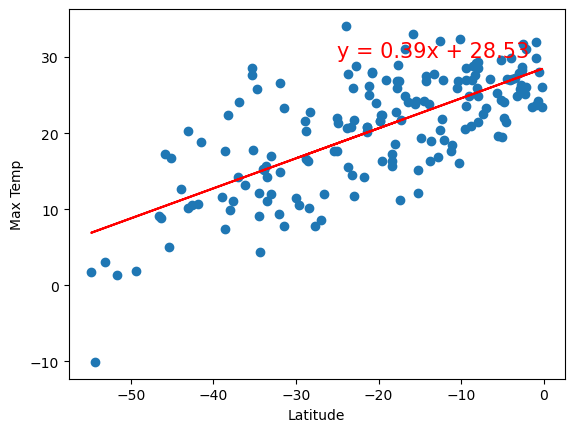

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"],(-25,30))

**Discussion about the linear relationship:** The correlation is centered on the equator. A positive coefficient indicate that as you move away from the equator, maximum temperatures tend to increase, while a negative coefficient would suggest the opposite.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0783


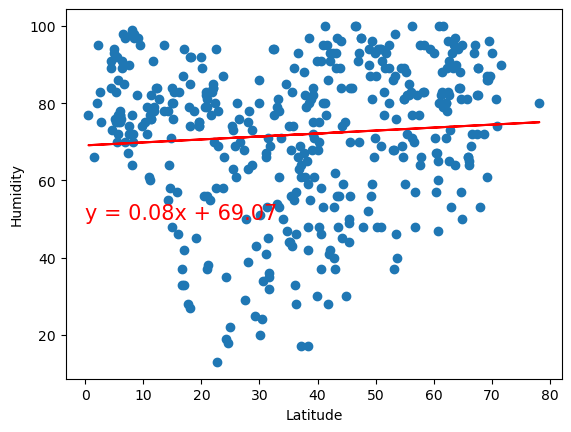

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(0,50))

The r-value is: -0.0019


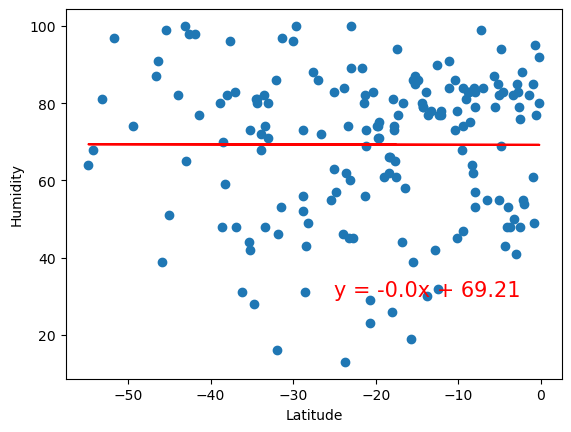

In [18]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-25,30))

**Discussion about the linear relationship:** Both Hemispheres exhibit a strong correlation between latitude and temperature. In the Northern Hemisphere, as we move further north from the equator, temperatures tend to decrease. Conversely, in the Southern Hemisphere, as we move south from the equator, temperatures also tend to decrease, indicating a similar negative correlation.The data shows a clear relationship between latitude and temperature in both Hemispheres, with temperatures generally decreasing as we move away from the equator in either direction.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0104


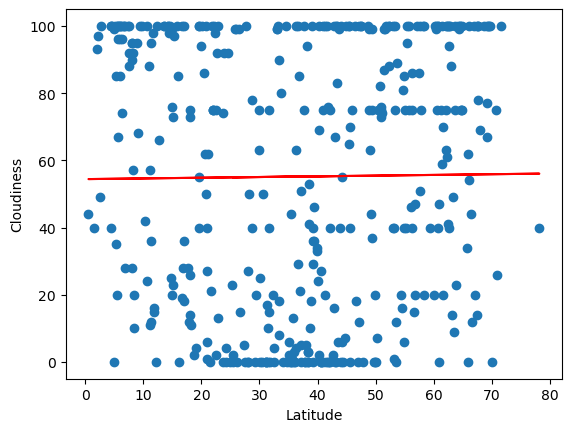

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Cloudiness"],(100,100))

The r-value is: -0.0863


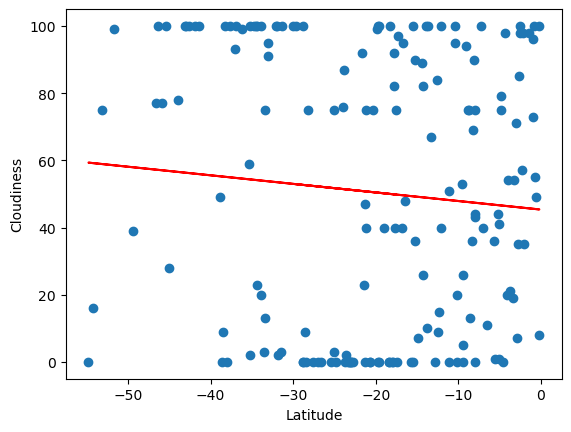

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Cloudiness"],(50,50))

**Discussion about the linear relationship:** Cloudiness vs. Latitude relationship in both hemispheres is relatively weak. In the Northern Hemisphere, there is a minimal positive correlation, while in the Southern Hemisphere, there is a moderate negative correlation. These correlations suggest that latitude alone is not a strong predictor of cloudiness, and other factors may play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0638


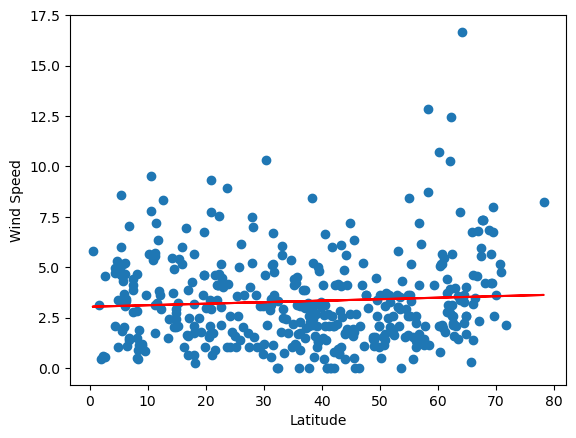

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(45,25))

The r-value is: -0.1377


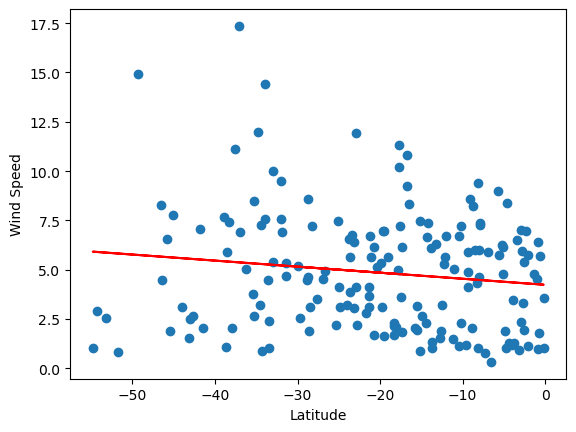

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Wind Speed"],(-40,33))

**Discussion about the linear relationship:** The Wind Speed vs. Latitude relationship in both hemispheres is very weak. In the Northern Hemisphere, there is a minimal positive correlation, while in the Southern Hemisphere, there is a weak negative correlation. These correlations imply that latitude alone is not a strong predictor of wind speed, and other factors likely play a more significant role in determining wind speed levels in both hemispheres.